# **Stage 1 Data Exploration & Preprocessing**


In [21]:
#cell 1
import os
import pandas as pd

# Define the paths
base_path = '/kaggle/input/plantvillage'
dataset_path = '/kaggle/input/plantvillage/dataset'
test_path = '/kaggle/input/plantvillage/dataset/test'
train_path = '/kaggle/input/plantvillage/dataset/train'
validation_path = '/kaggle/input/plantvillage/dataset/validation'

# Function to count files in a directory and its subdirectories
def count_files(directory):
    file_count = 0
    class_counts = {}
    
    if os.path.exists(directory):
        for class_name in os.listdir(directory):
            class_dir = os.path.join(directory, class_name)
            if os.path.isdir(class_dir):
                num_files = len(os.listdir(class_dir))
                class_counts[class_name] = num_files
                file_count += num_files
    return file_count, class_counts

# Get counts for each directory
total_files, _ = count_files(dataset_path)
test_count, test_classes = count_files(test_path)
train_count, train_classes = count_files(train_path)
val_count, val_classes = count_files(validation_path)

# Create a summary DataFrame
summary = pd.DataFrame({
    'Directory': ['/kaggle/input/plantvillage', 
                 '/kaggle/input/plantvillage/dataset',
                 '/kaggle/input/plantvillage/dataset/train',
                 '/kaggle/input/plantvillage/dataset/test',
                 '/kaggle/input/plantvillage/dataset/validation'],
    'Exists': [os.path.exists(base_path),
              os.path.exists(dataset_path),
              os.path.exists(train_path),
              os.path.exists(test_path),
              os.path.exists(validation_path)],
    'Total Files': [len(os.listdir(base_path)) if os.path.exists(base_path) else 0,
                   total_files,
                   train_count,
                   test_count,
                   val_count],
    'Subdirectories': [len(os.listdir(base_path)) if os.path.exists(base_path) else 0,
                      len(os.listdir(dataset_path)) if os.path.exists(dataset_path) else 0,
                      len(train_classes),
                      len(test_classes),
                      len(val_classes)]
})

print("Dataset Structure Summary:")
print(summary)

# Show class distribution in each split
print("\nClass Distribution:")

def print_class_distribution(name, class_counts):
    print(f"\n{name} set ({sum(class_counts.values())} images):")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} images")

print_class_distribution("Training", train_classes)
print_class_distribution("Test", test_classes)
print_class_distribution("Validation", val_classes)

Dataset Structure Summary:
                                       Directory  Exists  Total Files  \
0                     /kaggle/input/plantvillage    True            1   
1             /kaggle/input/plantvillage/dataset    True           45   
2       /kaggle/input/plantvillage/dataset/train    True        16504   
3        /kaggle/input/plantvillage/dataset/test    True         2064   
4  /kaggle/input/plantvillage/dataset/validation    True         2070   

   Subdirectories  
0               1  
1               3  
2              15  
3              15  
4              15  

Class Distribution:

Training set (16504 images):
  Pepper__bell___Bacterial_spot: 797 images
  Potato___healthy: 121 images
  Tomato_Leaf_Mold: 761 images
  Tomato__Tomato_YellowLeaf__Curl_Virus: 2566 images
  Tomato_Bacterial_spot: 1701 images
  Tomato_Septoria_leaf_spot: 1416 images
  Tomato_healthy: 1272 images
  Tomato_Spider_mites_Two_spotted_spider_mite: 1340 images
  Tomato_Early_blight: 800 images
  T

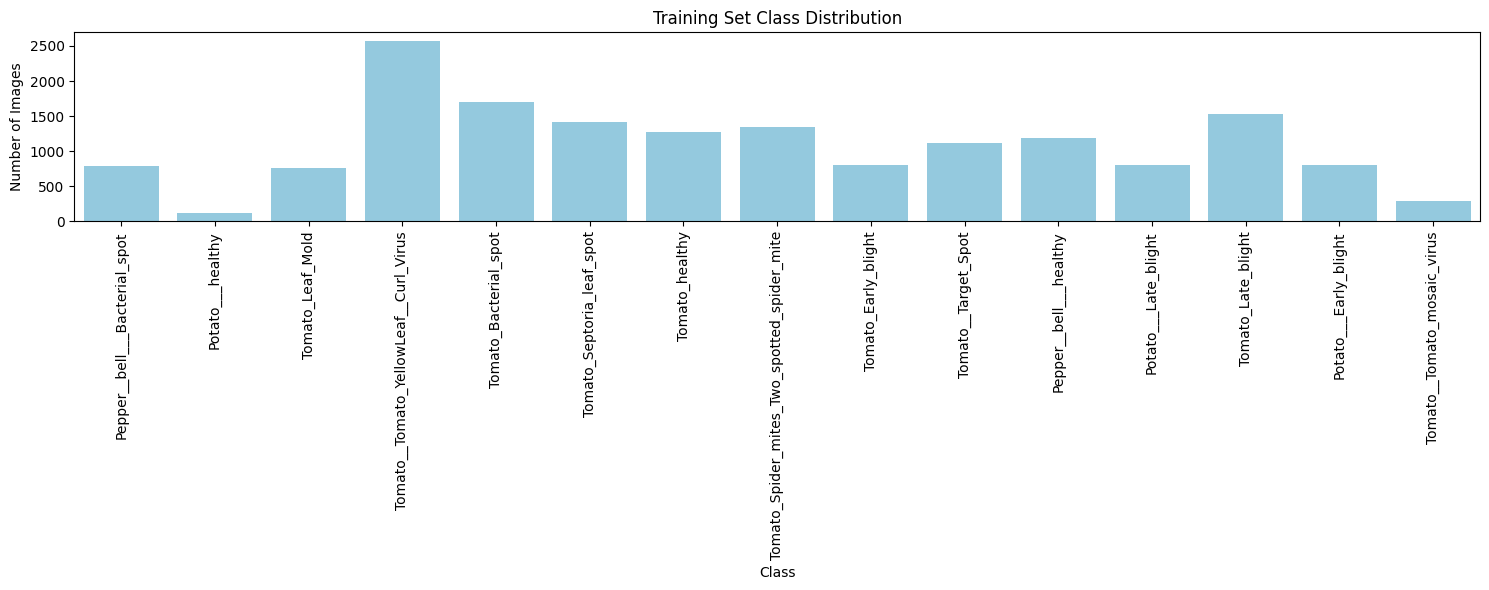

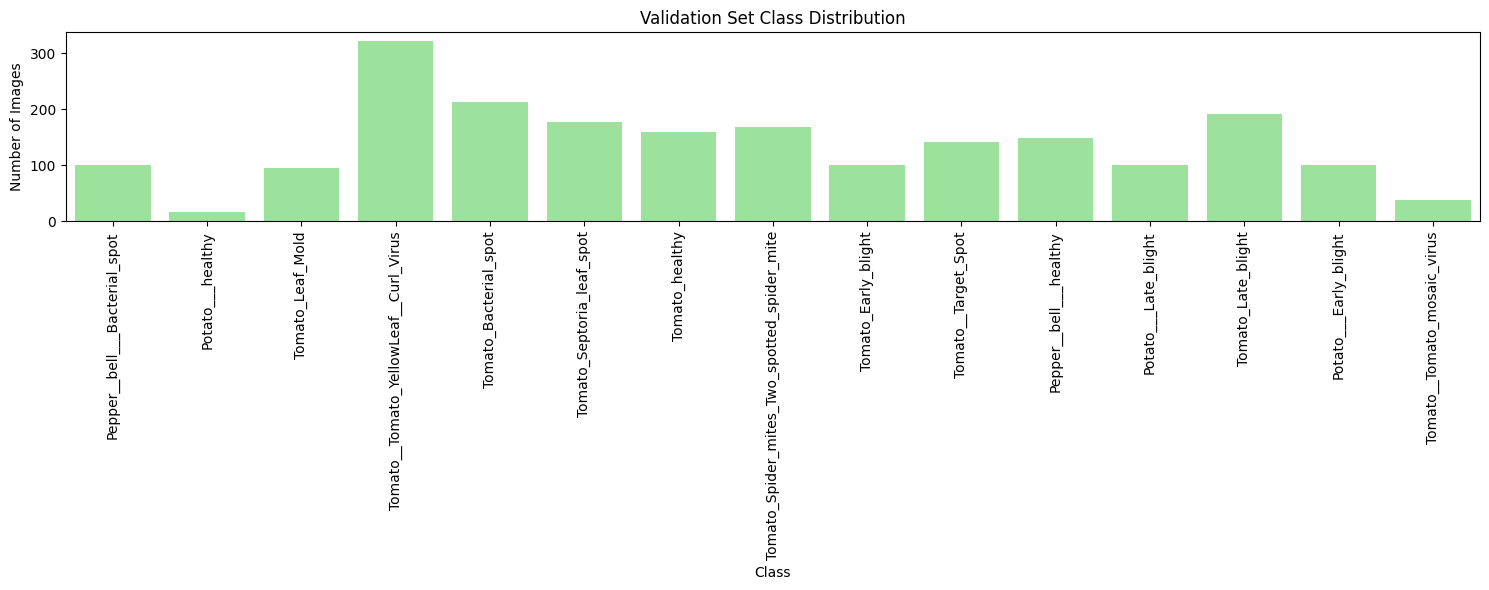

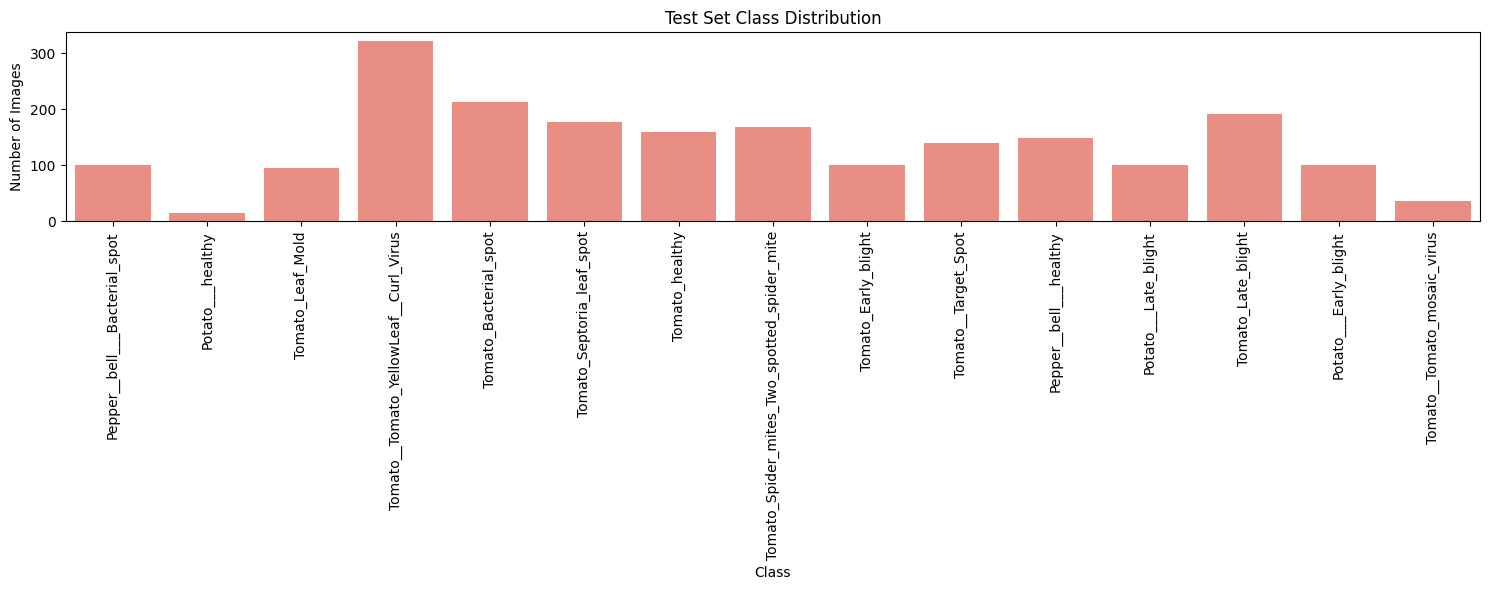

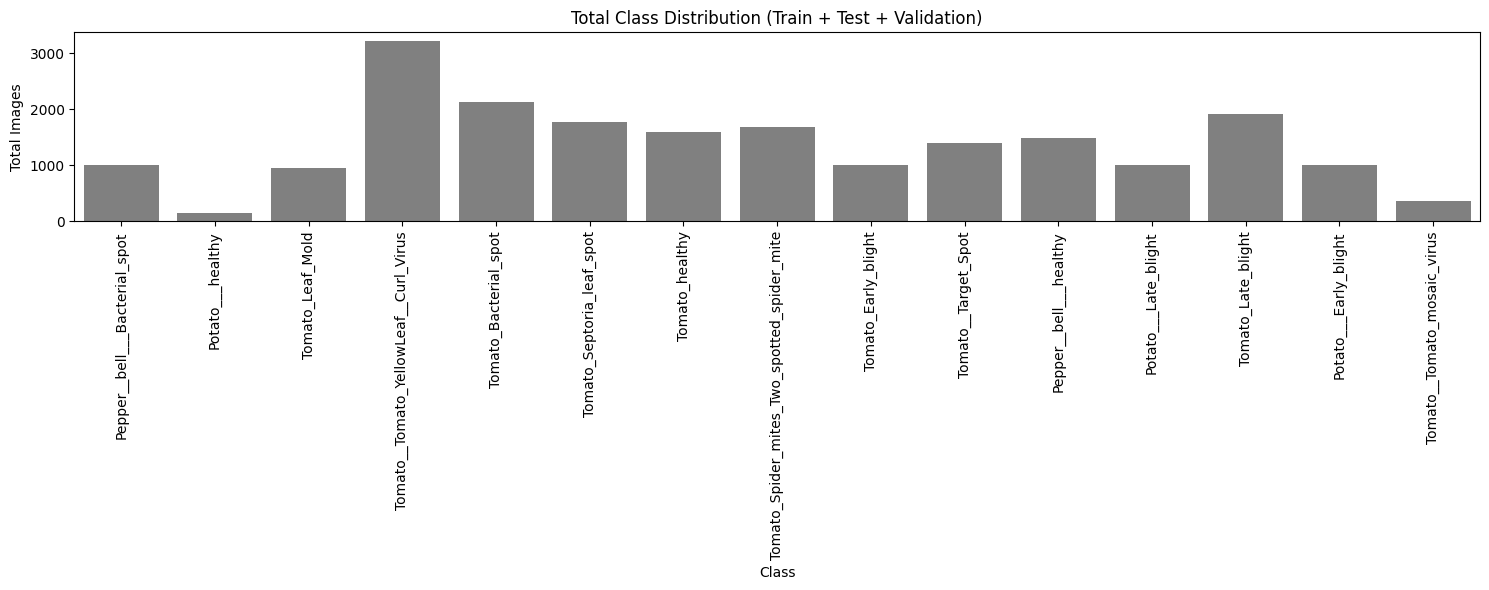

In [22]:
# A. Class Distribution Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert class counts to DataFrames
train_counts = pd.DataFrame.from_dict(train_classes, orient='index', columns=['Train'])
test_counts = pd.DataFrame.from_dict(test_classes, orient='index', columns=['Test'])
val_counts = pd.DataFrame.from_dict(val_classes, orient='index', columns=['Validation'])

# Combine into one DataFrame
class_distribution = pd.concat([train_counts, test_counts, val_counts], axis=1)
class_distribution['Total'] = class_distribution.sum(axis=1)

# Reset index for plotting
plot_df = class_distribution.reset_index()
plot_df = plot_df.rename(columns={'index': 'Class'})

# Plot: Training Set
plt.figure(figsize=(15, 6))
sns.barplot(data=plot_df, x='Class', y='Train', color='skyblue')
plt.title("Training Set Class Distribution")
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

# Plot: Validation Set
plt.figure(figsize=(15, 6))
sns.barplot(data=plot_df, x='Class', y='Validation', color='lightgreen')
plt.title("Validation Set Class Distribution")
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

# Plot: Test Set
plt.figure(figsize=(15, 6))
sns.barplot(data=plot_df, x='Class', y='Test', color='salmon')
plt.title("Test Set Class Distribution")
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

# Optional: Total Distribution
plt.figure(figsize=(15, 6))
sns.barplot(data=plot_df, x='Class', y='Total', color='gray')
plt.title("Total Class Distribution (Train + Test + Validation)")
plt.xticks(rotation=90)
plt.ylabel("Total Images")
plt.xlabel("Class")
plt.tight_layout()
plt.show()


Average Width: 256px
Average Height: 256px
Min Dimensions: 256x256
Max Dimensions: 256x256


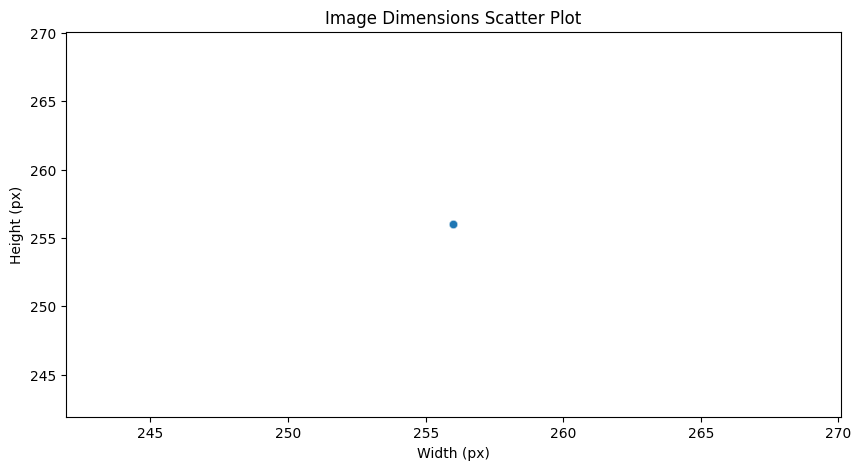

In [23]:
##Cell 3
# B. Image Dimension Analysis


from PIL import Image
import numpy as np

def analyze_image_dimensions(directory, sample_size=50):
    widths, heights = [], []
    
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        images = os.listdir(class_path)[:sample_size]
        
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            with Image.open(img_path) as img:
                widths.append(img.width)
                heights.append(img.height)
    
    return widths, heights

# Analyze training set dimensions
widths, heights = analyze_image_dimensions(train_path)

print(f"Average Width: {np.mean(widths):.0f}px")
print(f"Average Height: {np.mean(heights):.0f}px")
print(f"Min Dimensions: {min(widths)}x{min(heights)}")
print(f"Max Dimensions: {max(widths)}x{max(heights)}")

# Plot distribution
plt.figure(figsize=(10, 5))
sns.scatterplot(x=widths, y=heights, alpha=0.5)
plt.title("Image Dimensions Scatter Plot")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.show()

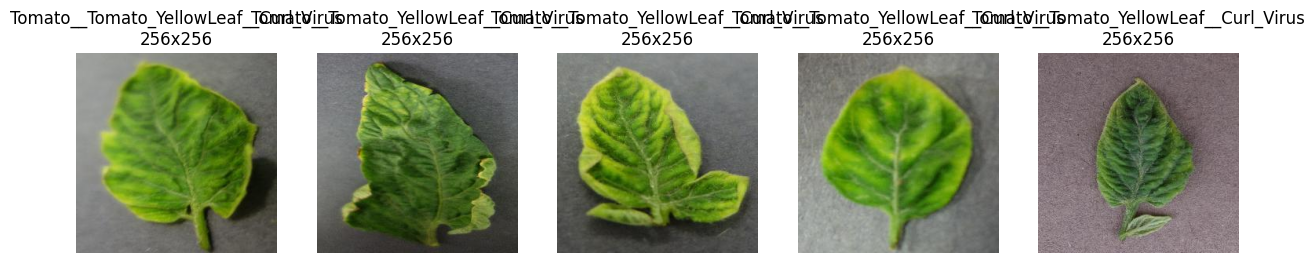

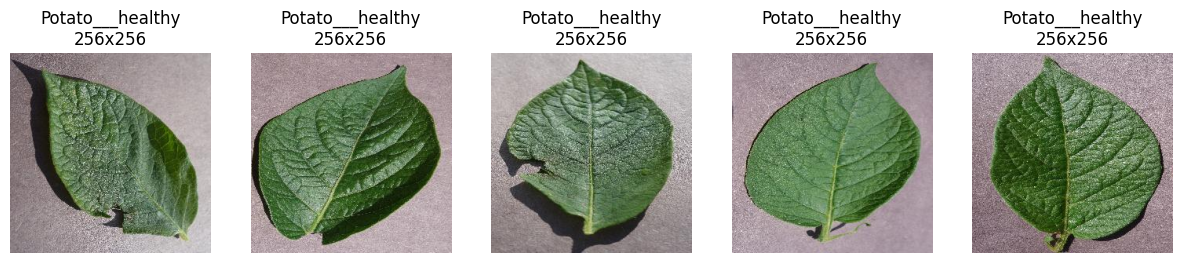

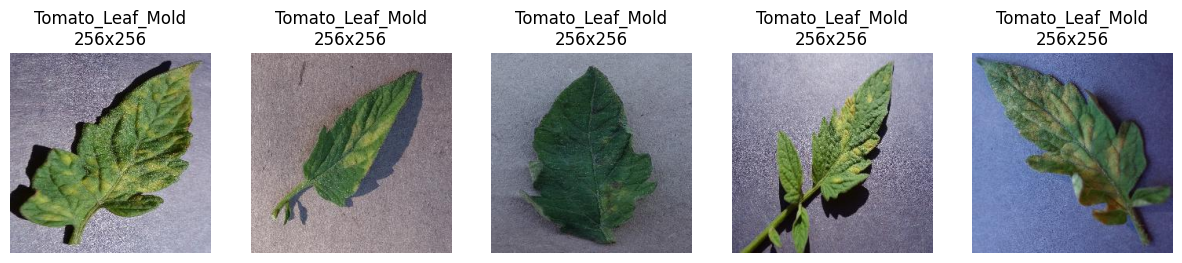

In [24]:
# cell 4 
# C. Sample Image Visualization

def display_class_samples(class_name, n_samples=5):
    class_dir = os.path.join(train_path, class_name)
    sample_images = os.listdir(class_dir)[:n_samples]
    
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        
        plt.subplot(1, n_samples, i+1)
        plt.imshow(img)
        plt.title(f"{class_name}\n{img.size[0]}x{img.size[1]}")
        plt.axis('off')
    plt.show()

# Display samples from 3 classes
display_class_samples("Tomato__Tomato_YellowLeaf__Curl_Virus")
display_class_samples("Potato___healthy")
display_class_samples("Tomato_Leaf_Mold")


In [28]:
# cell 5 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,         # Reduce rotation range from ±40 to ±20 degrees
    width_shift_range=0.2,     # Horizontal shift
    height_shift_range=0.2,    # Vertical shift
    shear_range=0.2,           # Shear transformations
    zoom_range=0.1,            # Reduce zoom range from 0.3 to 0.1
    horizontal_flip=True,      # Random flips
    vertical_flip=True,        # Useful for leaf images
    brightness_range=[0.8, 1.2], # Reduce brightness adjustment range
    fill_mode='reflect'        # Better than 'nearest' for leaves
)


# For validation/test (only normalization)
test_val_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
# cell 6 
from sklearn.utils import class_weight
import numpy as np

# Prepare training labels array
train_labels = []
for i, class_name in enumerate(sorted(train_classes.keys())):
    train_labels.extend([i] * train_classes[class_name])
train_labels = np.array(train_labels)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

# Normalize the class weights between 1 and 2
max_weight = max(class_weights)
min_weight = min(class_weights)
class_weights = {i: (w - min_weight) / (max_weight - min_weight) + 1 for i, w in enumerate(class_weights)}

# Print class weights for verification
print("Class Weights (Higher = More emphasis on minority classes):")
for i, class_name in enumerate(sorted(train_classes.keys())): 
    print(f"{i}: {class_name:45} → weight: {class_weights[i]:.2f}")


Class Weights (Higher = More emphasis on minority classes):
0: Pepper__bell___Bacterial_spot                 → weight: 1.11
1: Pepper__bell___healthy                        → weight: 1.06
2: Potato___Early_blight                         → weight: 1.11
3: Potato___Late_blight                          → weight: 1.11
4: Potato___healthy                              → weight: 2.00
5: Tomato_Bacterial_spot                         → weight: 1.03
6: Tomato_Early_blight                           → weight: 1.11
7: Tomato_Late_blight                            → weight: 1.03
8: Tomato_Leaf_Mold                              → weight: 1.12
9: Tomato_Septoria_leaf_spot                     → weight: 1.04
10: Tomato_Spider_mites_Two_spotted_spider_mite   → weight: 1.05
11: Tomato__Target_Spot                           → weight: 1.06
12: Tomato__Tomato_YellowLeaf__Curl_Virus         → weight: 1.00
13: Tomato__Tomato_mosaic_virus                   → weight: 1.38
14: Tomato_healthy                      

In [30]:
# cell 7
batch_size = 32
target_size = (256, 256)

# Training generator with updated augmentation
train_generator = augmentation.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Critical for augmentation
)

# Validation generator (no augmentation)
val_generator = test_val_datagen.flow_from_directory(
    validation_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle validation data
)


Found 16504 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


In [31]:
#cell 8 
import json

config = {
    'target_size': target_size,
    'batch_size': batch_size,
    'class_weights': class_weights,
    'class_indices': train_generator.class_indices,
    'augmentation_params': {
        'rotation_range': augmentation.rotation_range,
        'width_shift_range': augmentation.width_shift_range,
        'height_shift_range': augmentation.height_shift_range,
        'shear_range': augmentation.shear_range,
        'zoom_range': augmentation.zoom_range,
        'horizontal_flip': augmentation.horizontal_flip,
        'vertical_flip': augmentation.vertical_flip,
        'brightness_range': augmentation.brightness_range,
        'fill_mode': augmentation.fill_mode
    }
}

with open('preprocessing_config.json', 'w') as f:
    json.dump(config, f, indent=2)


In [32]:
# cell 9
print("\nData Preparation Summary:")
print(f"- Training samples: {train_generator.samples}")
print(f"- Validation samples: {val_generator.samples}")
print(f"- Class weights: {class_weights}")
print("\nNext step: Pass these to model.fit():")
print(f"model.fit(train_generator, validation_data=val_generator, class_weight=class_weights)")



Data Preparation Summary:
- Training samples: 16504
- Validation samples: 2070
- Class weights: {0: 1.1098439187854248, 1: 1.0579462212672015, 2: 1.1092464212678936, 3: 1.1092464212678936, 4: 2.0, 5: 1.0251662380723958, 6: 1.1092464212678936, 7: 1.033673093586071, 8: 1.1173813381918636, 9: 1.0401921366099385, 10: 1.0452785153984678, 11: 1.0635906232757348, 12: 1.0, 13: 1.3766459422736443, 14: 1.050344690100449}

Next step: Pass these to model.fit():
model.fit(train_generator, validation_data=val_generator, class_weight=class_weights)


# **Stage 2 CNN training**


In [33]:
# Cell 1 — Imports & paths
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
# Cell 2 — Generators (with correct preprocessing)
target_size = (280,280)
batch_size  = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=(0.6,1.4),
    fill_mode='reflect'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_directory(
    train_path, target_size=target_size,
    batch_size=batch_size, class_mode='categorical'
)
val_gen   = test_datagen.flow_from_directory(
    validation_path, target_size=target_size,
    batch_size=batch_size, class_mode='categorical'
)
test_gen  = test_datagen.flow_from_directory(
    test_path, target_size=target_size,
    batch_size=batch_size, class_mode='categorical', shuffle=False
)

Found 16504 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.


In [35]:
# Cell 3 — Build the TL model
backbone = EfficientNetB0(
    weights='imagenet', include_top=False,
    input_shape=(*target_size,3)
)

x = GlobalAveragePooling2D()(backbone.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(15, activation='softmax')(x)

tl_model = Model(backbone.input, outputs)

# start with backbone frozen
for layer in backbone.layers:
    layer.trainable = False

tl_model.compile(
    optimizer=Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
tl_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 280, 280,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 280, 280,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 280, 280,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 280, 280,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 281, 281,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 140, 140,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 140, 140,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 140, 140,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 140, 140,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 140, 140,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 140, 140,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 140, 140,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 140, 140,  │        512 │ block1a_se_excit

 Total params: 4,381,362 (16.71 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [36]:
# Cell 4 — Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_transfer_model.keras', 
                    monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [38]:
# Cell 5 — Train head only
history_head = tl_model.fit(
    train_gen, validation_data=val_gen,
    epochs=10, callbacks=callbacks, verbose=1
)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.9088 - loss: 0.2631
Epoch 1: val_accuracy did not improve from 0.95894
516/516 ━━━━━━━━━━━━━━━━━━━━ 334s 646ms/step - accuracy: 0.9088 - loss: 0.2631 - val_accuracy: 0.9488 - val_loss: 0.1444
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.9207 - loss: 0.2421
Epoch 2: val_accuracy did not improve from 0.95894
516/516 ━━━━━━━━━━━━━━━━━━━━ 321s 622ms/step - accuracy: 0.9207 - loss: 0.2422 - val_accuracy: 0.9527 - val_loss: 0.1400
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.9171 - loss: 0.2416
Epoch 3: val_accuracy did not improve from 0.95894
516/516 ━━━━━━━━━━━━━━━━━━━━ 315s 610ms/step - accuracy: 0.9171 - loss: 0.2416 - val_accuracy: 0.9570 - val_loss: 0.1194
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.9169 - loss: 0.2401
Epoch 4: val_accuracy did not improve from 0.95894
516/516 ━━━━━━━━━━━━━━━━━━━━ 311s 603ms/step - accuracy: 0.9169 - loss: 0.2401 - 

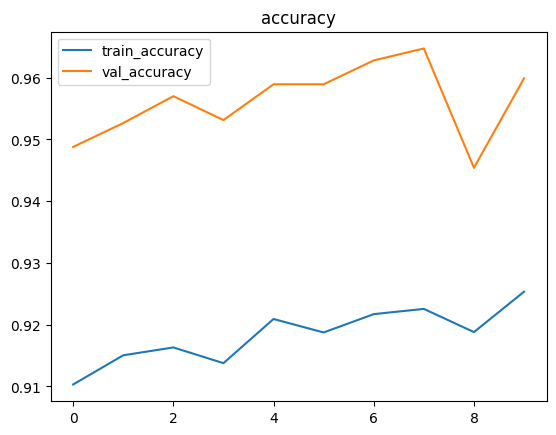

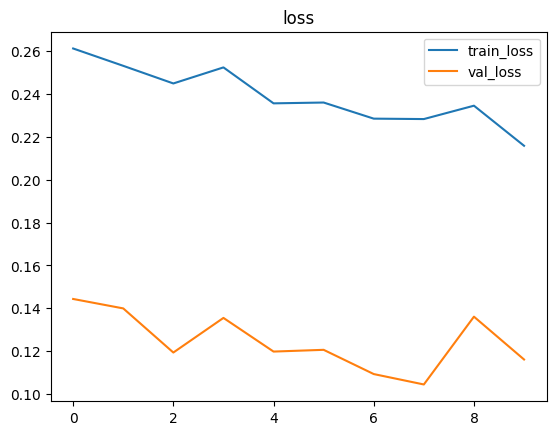

In [39]:
import matplotlib.pyplot as plt

for metric in ('accuracy','loss'):
    plt.plot(history_head.history[metric], label=f"train_{metric}")
    plt.plot(history_head.history[f"val_{metric}"], label=f"val_{metric}")
    plt.legend(); plt.title(metric); plt.show()


In [ ]:

# Cell 6 — Unfreeze last 30 layers, fine-tune
for layer in backbone.layers[-30:]:
    layer.trainable = True

tl_model.compile(
    optimizer=Adam(5e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft1 = tl_model.fit(
    train_gen, validation_data=val_gen,
    epochs=10, callbacks=callbacks, verbose=1
)


Epoch 1/10


E0000 00:00:1753208010.415848     156 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753208010.555453     156 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753208010.977476     156 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753208011.118533     156 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


299/516 ━━━━━━━━━━━━━━━━━━━━ 2:17 635ms/step - accuracy: 0.7947 - loss: 0.7443

E0000 00:00:1753208212.264729     158 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753208212.407448     158 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753208212.548034     158 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.8190 - loss: 0.6363
Epoch 1: val_accuracy did not improve from 0.96473
516/516 ━━━━━━━━━━━━━━━━━━━━ 389s 688ms/step - accuracy: 0.8191 - loss: 0.6359 - val_accuracy: 0.9498 - val_loss: 0.1324
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.9084 - loss: 0.2753
Epoch 2: val_accuracy did not improve from 0.96473
516/516 ━━━━━━━━━━━━━━━━━━━━ 318s 616ms/step - accuracy: 0.9084 - loss: 0.2753 - val_accuracy: 0.9599 - val_loss: 0.1061
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.9247 - loss: 0.2274
Epoch 3: val_accuracy improved from 0.96473 to 0.96522, saving model to best_transfer_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 321s 622ms/step - accuracy: 0.9247 - loss: 0.2274 - val_accuracy: 0.9652 - val_loss: 0.0933
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.9313 - loss: 0.2056
Epoch 4: val_accuracy improved from 0.96522 to 0.97101, saving model to best_transfer_model.kera

In [41]:
# Cell 7 — Unfreeze all, final fine-tuning
for layer in tl_model.layers:
    layer.trainable = True

tl_model.compile(
    optimizer=Adam(1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft2 = tl_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/10


E0000 00:00:1753212286.360833     158 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753212286.511259     158 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753212286.660043     158 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


501/516 ━━━━━━━━━━━━━━━━━━━━ 9s 647ms/step - accuracy: 0.7207 - loss: 1.0257 

E0000 00:00:1753212642.842836     157 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753212642.987742     157 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 706ms/step - accuracy: 0.7212 - loss: 1.0231
Epoch 1: val_accuracy did not improve from 0.98599
516/516 ━━━━━━━━━━━━━━━━━━━━ 471s 742ms/step - accuracy: 0.7213 - loss: 1.0229 - val_accuracy: 0.8773 - val_loss: 0.3683
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.7876 - loss: 0.7492
Epoch 2: val_accuracy did not improve from 0.98599
516/516 ━━━━━━━━━━━━━━━━━━━━ 329s 638ms/step - accuracy: 0.7876 - loss: 0.7491 - val_accuracy: 0.8923 - val_loss: 0.3117
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.8056 - loss: 0.6325
Epoch 3: val_accuracy did not improve from 0.98599
516/516 ━━━━━━━━━━━━━━━━━━━━ 328s 636ms/step - accuracy: 0.8056 - loss: 0.6325 - val_accuracy: 0.8995 - val_loss: 0.2758
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.8230 - loss: 0.5896
Epoch 4: val_accuracy did not improve from 0.98599
516/516 ━━━━━━━━━━━━━━━━━━━━ 330s 640ms/step - accuracy: 0.8230 - loss: 0.5896 - val_accurac

In [42]:
# Cell 8 — Evaluate
print("Val  Accuracy:", max(history_ft2.history['val_accuracy']))
test_loss, test_acc = tl_model.evaluate(test_gen, verbose=1)[:2]
print(f"Test Accuracy: {test_acc:.4f}")

Val  Accuracy: 0.9396135210990906
64/65 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9247 - loss: 0.2001

E0000 00:00:1753215869.787659     159 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753215869.952548     159 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.9247 - loss: 0.2005
Test Accuracy: 0.9249


In [43]:
# ─── Cell 9 — Save the Best & Final Models ─────────────────────────────────────

# You already have a ModelCheckpoint('best_transfer_model.keras') callback,
# so the best weights (by val_accuracy) are in best_transfer_model.keras.

# But let’s be explicit:

# 1) Save the best‐so‐far (already written by the callback):
#    best_transfer_model.keras

# 2) After all fine‐tuning, save your final weights:
tl_model.save('/kaggle/working/final_transfer_model.keras')
print("✅ Final transfer model saved to /kaggle/working/final_transfer_model.keras")

# Optional legacy H5:
tl_model.save('/kaggle/working/final_transfer_model.h5')

✅ Final transfer model saved to /kaggle/working/final_transfer_model.keras


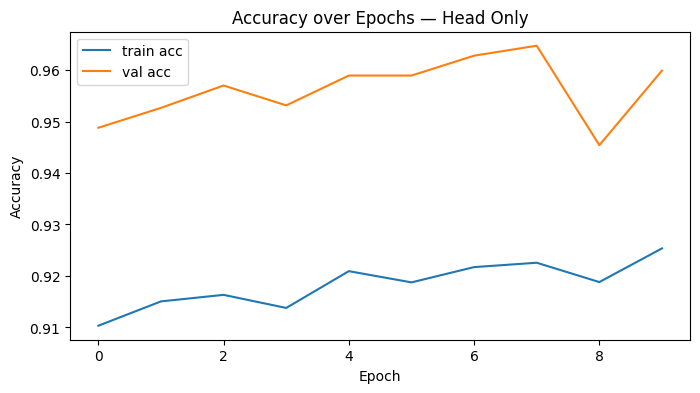

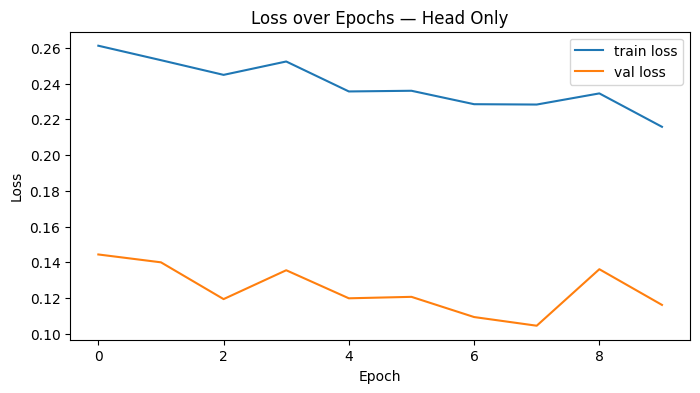

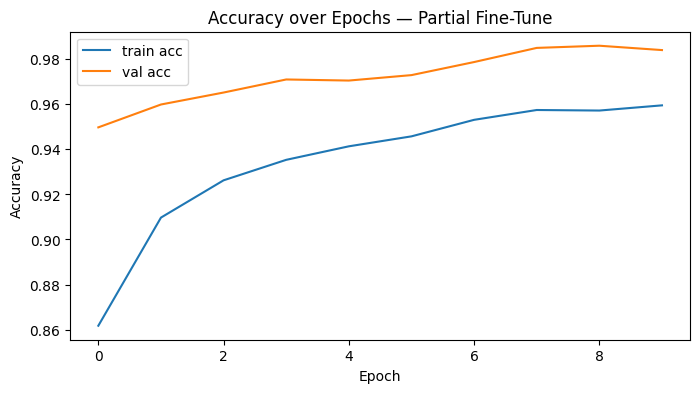

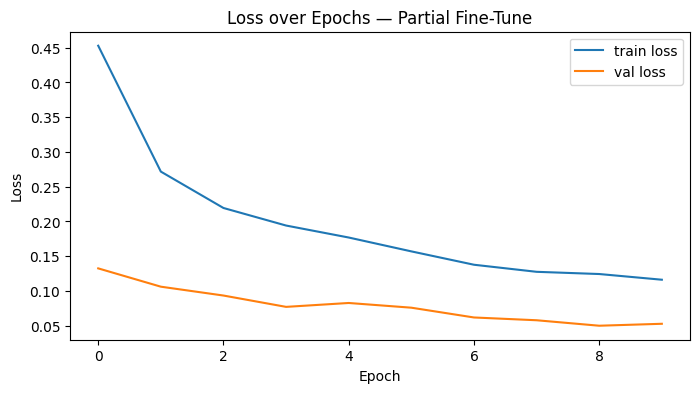

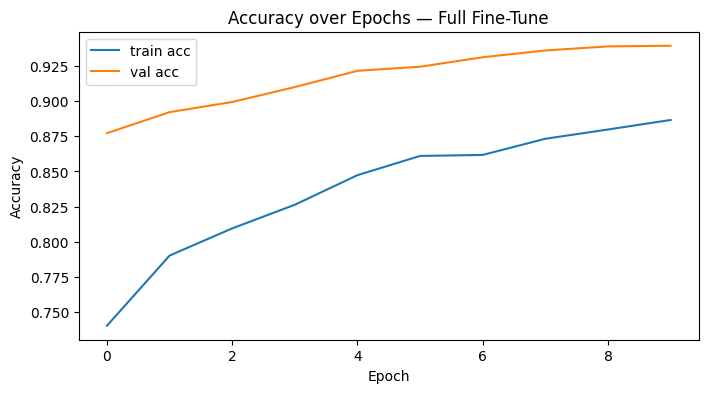

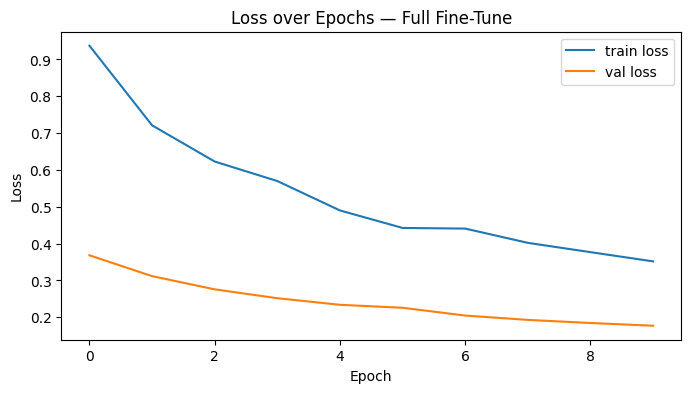

In [44]:
# ─── Cell 10 — Plot Training Curves ────────────────────────────────────────────

import matplotlib.pyplot as plt

def plot_history(hist, title_suffix=""):
    # accuracy
    plt.figure(figsize=(8,4))
    plt.plot(hist.history['accuracy'],     label='train acc')
    plt.plot(hist.history['val_accuracy'], label='val acc')
    plt.title(f'Accuracy over Epochs {title_suffix}')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.legend(); plt.show()
    
    # loss
    plt.figure(figsize=(8,4))
    plt.plot(hist.history['loss'],     label='train loss')
    plt.plot(hist.history['val_loss'], label='val loss')
    plt.title(f'Loss over Epochs {title_suffix}')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.show()

# Plot each phase if you kept their histories:
plot_history(history_head, "— Head Only")
plot_history(history_ft1, "— Partial Fine-Tune")
plot_history(history_ft2, "— Full Fine-Tune")

65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9247 - loss: 0.2005
🔹 Loss      : 0.2119
🔹 Compile_metrics: 0.9249
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 164ms/step


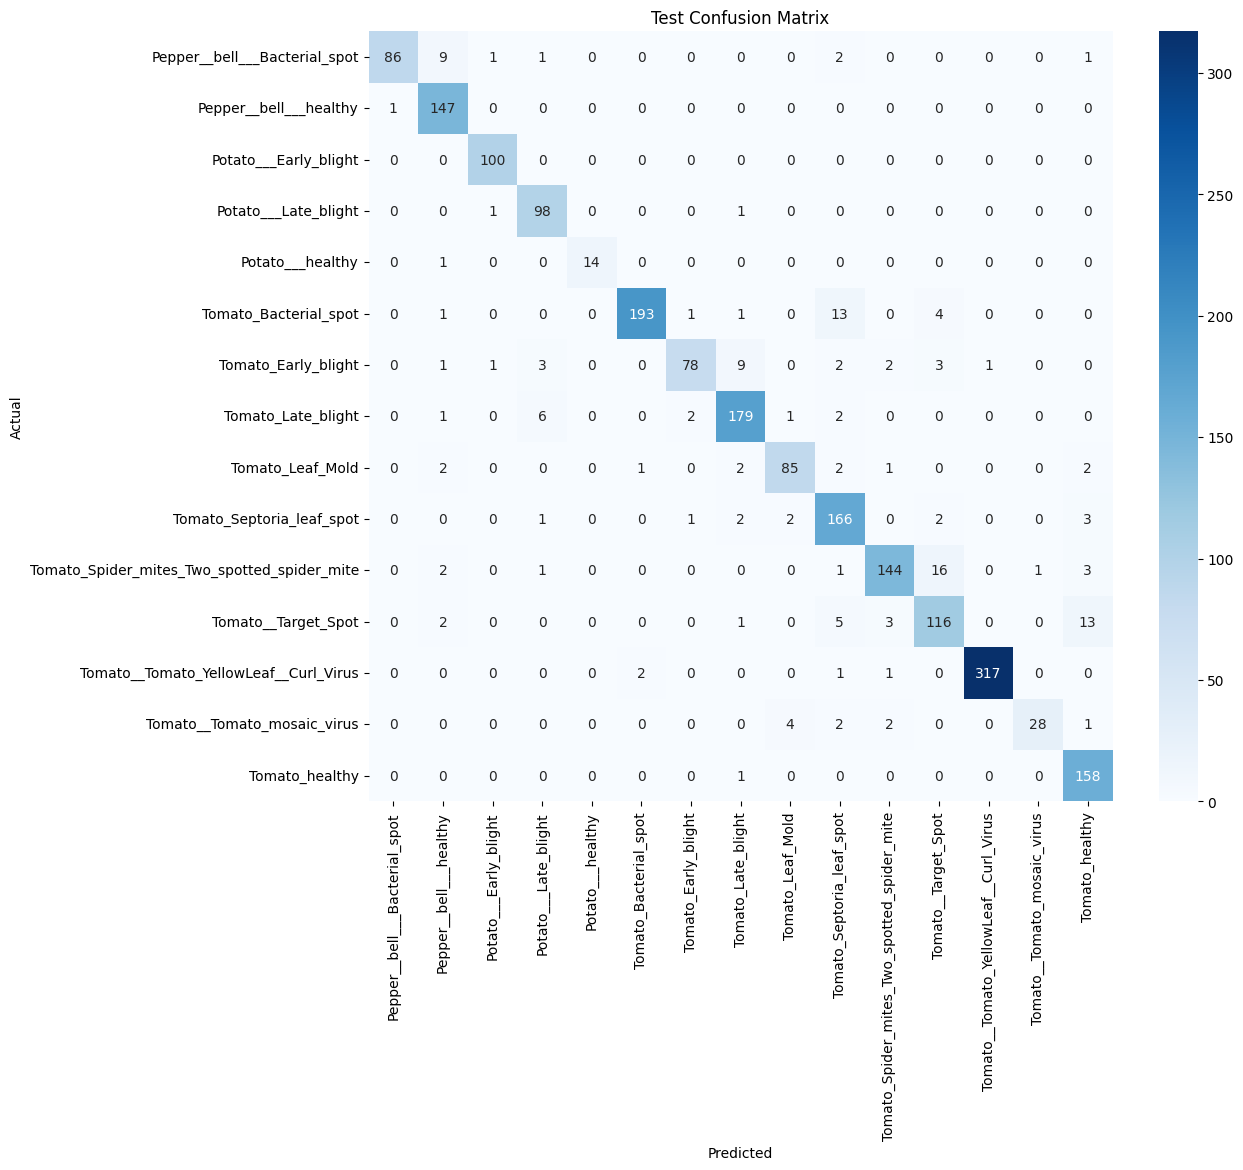


Classification Report:

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.86      0.92       100
                     Pepper__bell___healthy       0.89      0.99      0.94       148
                      Potato___Early_blight       0.97      1.00      0.99       100
                       Potato___Late_blight       0.89      0.98      0.93       100
                           Potato___healthy       1.00      0.93      0.97        15
                      Tomato_Bacterial_spot       0.98      0.91      0.94       213
                        Tomato_Early_blight       0.95      0.78      0.86       100
                         Tomato_Late_blight       0.91      0.94      0.93       191
                           Tomato_Leaf_Mold       0.92      0.89      0.91        95
                  Tomato_Septoria_leaf_spot       0.85      0.94      0.89       177
Tomato_Spider_mites_Two_spotted_spider_

In [45]:
# ─── Cell 11 — Final Evaluation & Confusion Matrix ────────────────────────────

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Evaluate on test set and print whatever metrics are available
results = tl_model.evaluate(test_gen, verbose=1)
names   = tl_model.metrics_names  # e.g. ['loss','accuracy','precision','recall']
for name, val in zip(names, results):
    print(f"🔹 {name.capitalize():<10}: {val:.4f}")

# 2) Confusion matrix & classification report
y_prob = tl_model.predict(test_gen, verbose=1)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [46]:
test_gen = test_datagen.flow_from_directory(
    test_path,  # Path to your test data folder
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # or 'binary' depending on your task
    shuffle=False  # Important to not shuffle when evaluating
)


Found 2064 images belonging to 15 classes.


In [47]:
# Evaluate on the full test dataset
test_loss, test_acc = tl_model.evaluate(test_gen, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9247 - loss: 0.2005
Test Loss: 0.2119
Test Accuracy: 0.9249


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


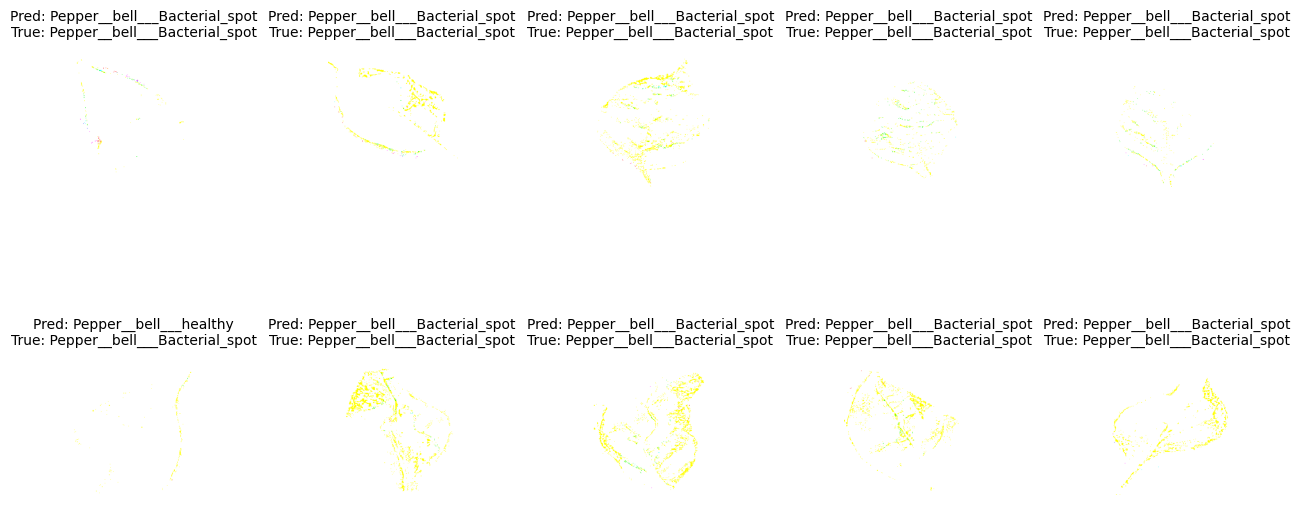

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Get the images and labels from the test set
test_images, test_labels = next(iter(test_gen))  # Get a batch from the generator

# Predict the labels for the batch
y_prob = tl_model.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)  # Get predicted class indices

# Get the class names from the test generator
class_names = list(test_gen.class_indices.keys())

# Create lists to store images and labels to show
images_to_show = []
labels_to_show = []

# Loop through all classes and collect 10 images from each class
for class_idx, class_name in enumerate(class_names):
    # Find indices of images that belong to the current class
    class_image_indices = np.where(np.argmax(test_labels, axis=1) == class_idx)[0]  # Convert one-hot to index
    
    # Check if there are at least 10 images
    num_images = min(len(class_image_indices), 10)
    
    # Select up to 10 images of this class
    class_images = [test_images[i] for i in class_image_indices[:num_images]]
    class_labels = [test_labels[i] for i in class_image_indices[:num_images]]
    
    # Add them to the lists
    images_to_show.extend(class_images)
    labels_to_show.extend(class_labels)

# Display 10 test images with their predicted and true labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in np.arange(10):
    axes[i].imshow(images_to_show[i])
    
    # Convert one-hot encoding to class index for true labels
    true_label = np.argmax(labels_to_show[i])
    
    # Add padding between predicted and true labels
    axes[i].set_title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[true_label]}", 
                      fontsize=10, pad=15)
    
    axes[i].axis('off')

plt.subplots_adjust(wspace=1.0, hspace=1.0)  # Increase horizontal and vertical space between subplots
plt.show()


Class 'Pepper__bell___Bacterial_spot' selected image index: 0
Class 'Pepper__bell___healthy' selected image index: 2
Class 'Potato___Early_blight' selected image index: 3
Class 'Potato___Late_blight' selected image index: 2
Class 'Potato___healthy' selected image index: 2
Class 'Tomato_Bacterial_spot' selected image index: 0
Class 'Tomato_Early_blight' selected image index: 6
Class 'Tomato_Late_blight' selected image index: 2
Class 'Tomato_Leaf_Mold' selected image index: 5
Class 'Tomato_Septoria_leaf_spot' selected image index: 2
Class 'Tomato_Spider_mites_Two_spotted_spider_mite' selected image index: 4
Class 'Tomato__Target_Spot' selected image index: 4
Class 'Tomato__Tomato_YellowLeaf__Curl_Virus' selected image index: 4
Class 'Tomato__Tomato_mosaic_virus' selected image index: 9
Class 'Tomato_healthy' selected image index: 0


E0000 00:00:1753216891.519103     157 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753216891.669833     157 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1753216891.801969     157 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


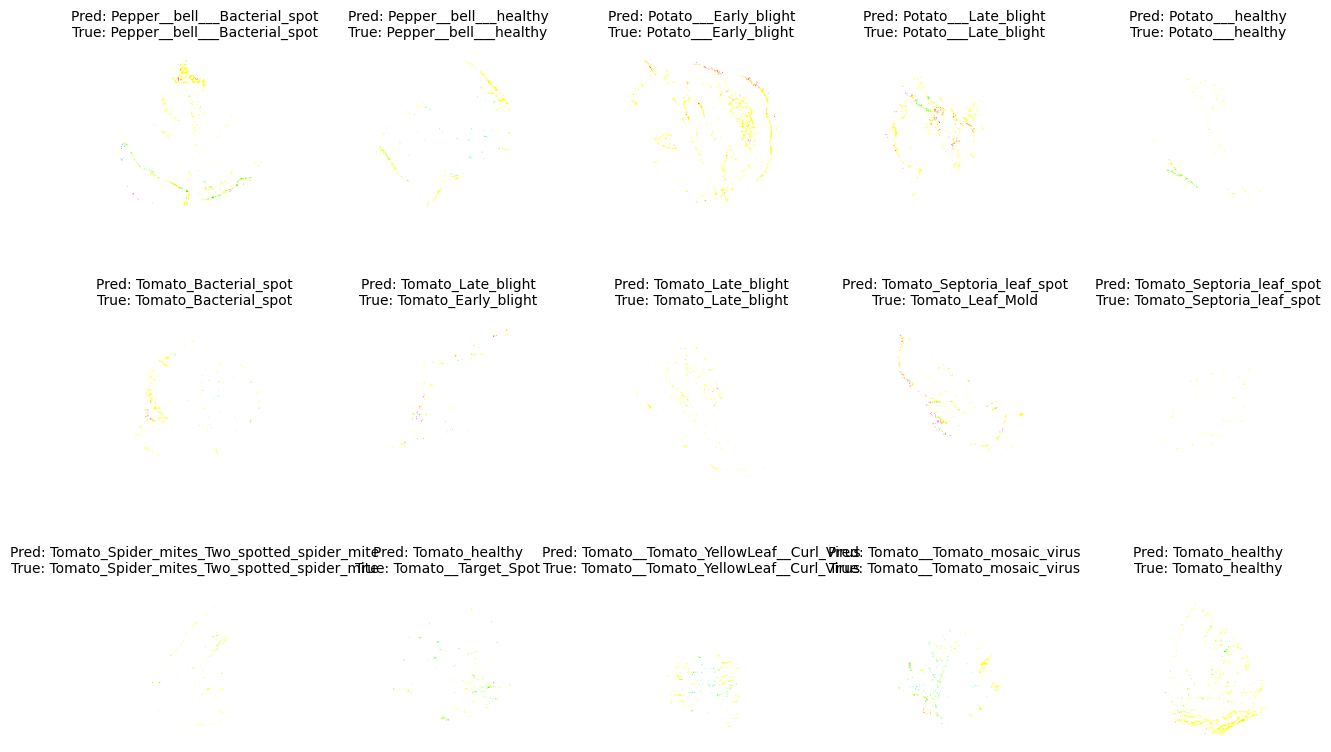

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store images and labels to show
images_to_show = []
labels_to_show = []

# Get the class names from the generator
class_names = list(test_gen.class_indices.keys())

# Loop through the generator
for class_idx, class_name in enumerate(class_names):
    # Iterate through the generator and fetch one image per class
    for i, (img_batch, label_batch) in enumerate(test_gen):
        if class_name in test_gen.class_indices:
            class_label = np.argmax(label_batch[0])  # Get the class index of the batch
            if class_label == class_idx:  # If the current image belongs to the current class
                images_to_show.append(img_batch[0])  # Store the image
                labels_to_show.append(label_batch[0])  # Store the label
                print(f"Class '{class_name}' selected image index: {i}")
                break  # Only fetch one image per class

# Now display the images
fig, axes = plt.subplots(3, 5, figsize=(15, 9))  # Adjusting for 15 classes
axes = axes.ravel()

for i in np.arange(len(images_to_show)):
    axes[i].imshow(images_to_show[i])
    
    # Convert one-hot encoding to class index for true labels
    true_label = np.argmax(labels_to_show[i])
    
    # Predict the label for the image
    y_prob = tl_model.predict(np.expand_dims(images_to_show[i], axis=0))  # Add batch dimension
    y_pred = np.argmax(y_prob, axis=1)

    # Add padding between predicted and true labels
    axes[i].set_title(f"Pred: {class_names[y_pred[0]]}\nTrue: {class_names[true_label]}", 
                      fontsize=10, pad=15)
    
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.7, hspace=0.7) 
plt.show()


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Load Keras model
model = tf.keras.models.load_model("/kaggle/input/plantdetect/other/default/1/final_transfer_model (2).keras")

# Class names in training order
class_names = [
    'Pepper__bell___Bacterial_spot',
    'Pepper__bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato_Bacterial_spot',
    'Tomato_Early_blight',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

def predict_plant_disease(img):
    img = img.convert("RGB").resize((280, 280))
    arr = np.array(img).astype(np.float32)
    arr = preprocess_input(arr)  # scale to [-1, 1]
    arr = np.expand_dims(arr, axis=0)

    pred = model.predict(arr, verbose=0)
    index = np.argmax(pred)
    confidence = float(np.max(pred)) * 100

    return f"{class_names[index]} ({confidence:.2f}%)"

interface = gr.Interface(
    fn=predict_plant_disease,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(),
    title="Plant Disease Detector",
    description="Upload a leaf image to detect plant disease using a Keras EfficientNet model."
)

interface.launch(debug=True)
